# Лабораторная работа №4

In [1]:
!pwd

/Users/artyem.petrov/dev/university/4-1/machine-learning-basics-and-neural-networks/lab04


## Задание 1: kNN. Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

In [10]:
!../.venv/bin/pip install matplotlib scipy scikit-learn

  Using cached scikit_learn-1.7.2-cp313-cp313-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp313-cp313-macosx_12_0_arm64.whl (8.6 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn]━━━━━ 2/3 [scikit-learn]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /Users/artyem.petrov/dev/university/4-1/machine-learning-basics-and-neural-networks/.venv/bin/python -m pip install --upgrade pip


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


In [13]:
X.shape

(178, 13)

### Задача 1.1. 

Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [16]:
X.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

**Null'ов в датафрейме нет**

In [18]:
X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

**Категориальных фичей также нет**

### Задача 1.2. 

Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, зафиксируйте параметр `random_state = 123` для воспроизводимости результатов.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)  # стратификация для сохранения пропорций классов

In [22]:
( ( X_train.shape, y_train.shape ) , ( X_test.shape, y_test.shape) )

(((124, 13), (124,)), ((54, 13), (54,)))

### Задача 1.3. 

На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

features = ['alcohol', 'magnesium']
X_train_selected = X_train[features]
X_test_selected = X_test[features]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Параметры для kNN (число соседей)
n_neighbors_list = [1, 3, 5, 10, 15, 25]

print("NN \t Train \t Test")
print("-" * 20)

for n_neighbors in n_neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    
    y_train_pred = knn.predict(X_train_scaled)
    y_test_pred = knn.predict(X_test_scaled)
    
    train_accuracy = np.mean(y_train_pred == y_train)
    test_accuracy = np.mean(y_test_pred == y_test)
    
    print(f"{n_neighbors} \t {train_accuracy:.2f} \t {test_accuracy:.2f}")

NN 	 Train 	 Test
--------------------
1 	 0.99 	 0.65
3 	 0.78 	 0.70
5 	 0.75 	 0.72
10 	 0.75 	 0.70
15 	 0.71 	 0.72
25 	 0.71 	 0.72


### Задача 1.5. 
Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision region grids). Постройте такую сетку графиков для обученных выше классификаторов. __Важно__: это задание является продолжением задания 1.3  

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графиков может занять некоторое время.

Постройте аналогичные графики ниже для `y_test` и нужных столбцов из `X_test` 

In [25]:
!../.venv/bin/pip install mlxtend

  Using cached mlxtend-0.23.4-py3-none-any.whl.metadata (7.3 kB)
Using cached mlxtend-0.23.4-py3-none-any.whl (1.4 MB)

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /Users/artyem.petrov/dev/university/4-1/machine-learning-basics-and-neural-networks/.venv/bin/python -m pip install --upgrade pip


In [26]:
import mlxtend

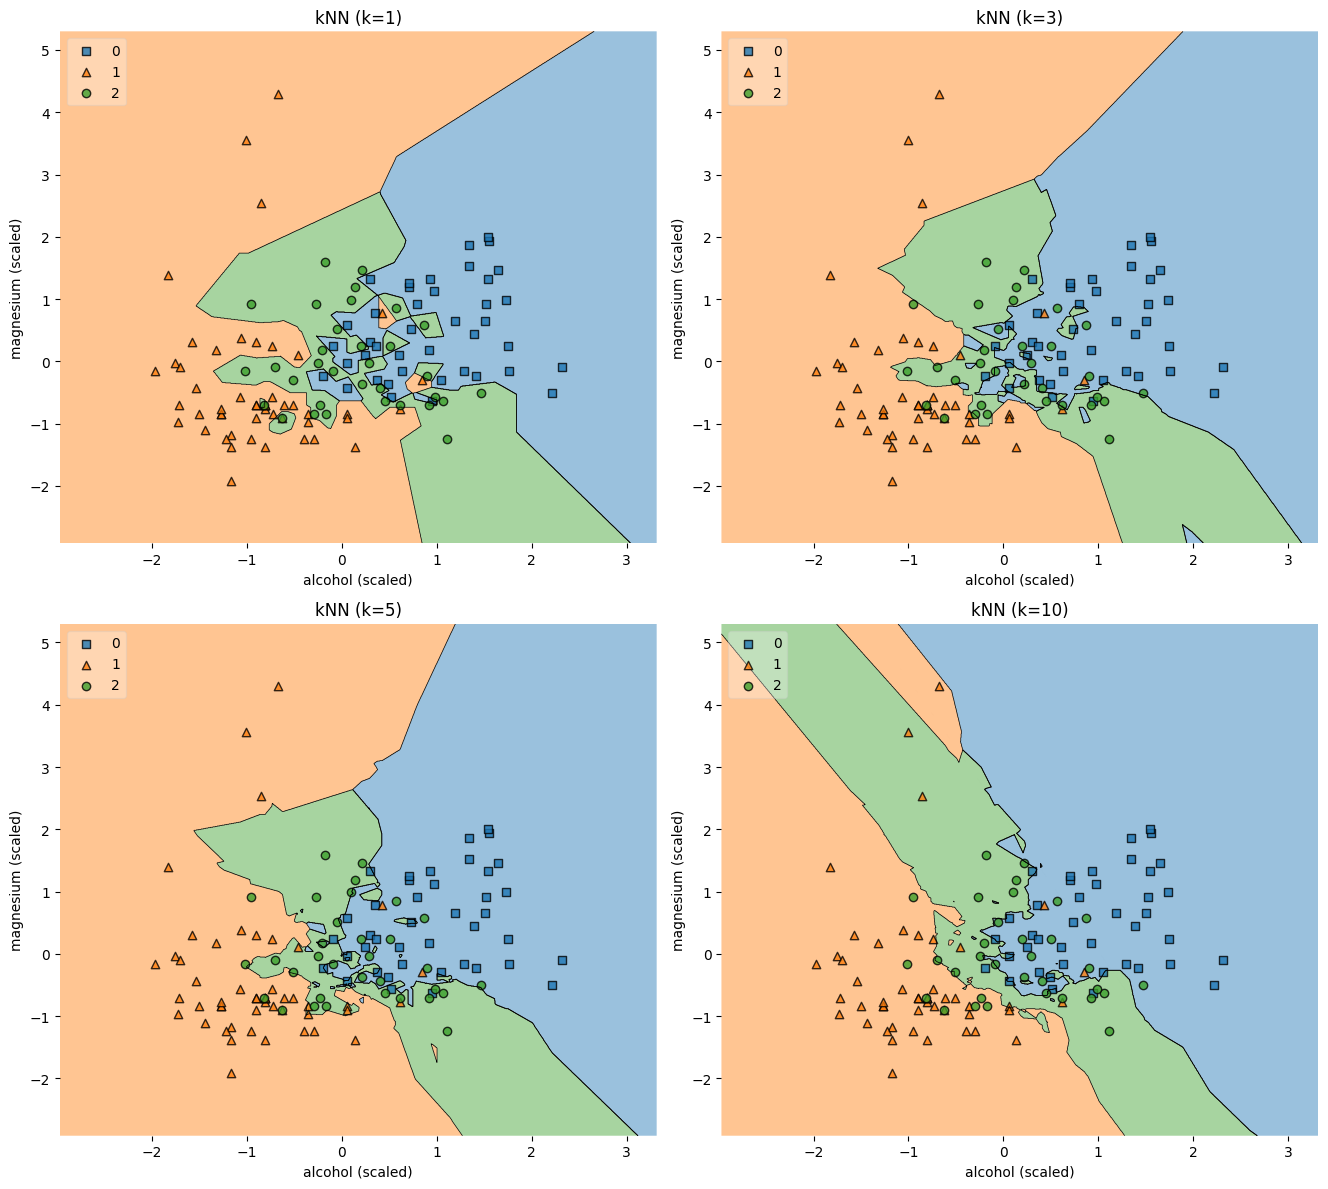

In [29]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions
import numpy as np

classifiers = []
n_neighbors_list = [1, 3, 5, 10, 15, 25]

for n_neighbors in n_neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    classifiers.append(knn)

X_train_plot = X_train_scaled
y_train_plot = y_train
X_test_plot = X_test_scaled
y_test_plot = y_test

gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(20, 12))

for clf, lab, grd in zip(classifiers, 
                         [f'kNN (k={n})' for n in n_neighbors_list],
                         itertools.product([0, 1], repeat=2)):
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_decision_regions(X=X_train_plot, y=y_train_plot, clf=clf, legend=2)
    plt.title(lab)
    plt.xlabel('alcohol (scaled)')
    plt.ylabel('magnesium (scaled)')

plt.tight_layout()
plt.show()

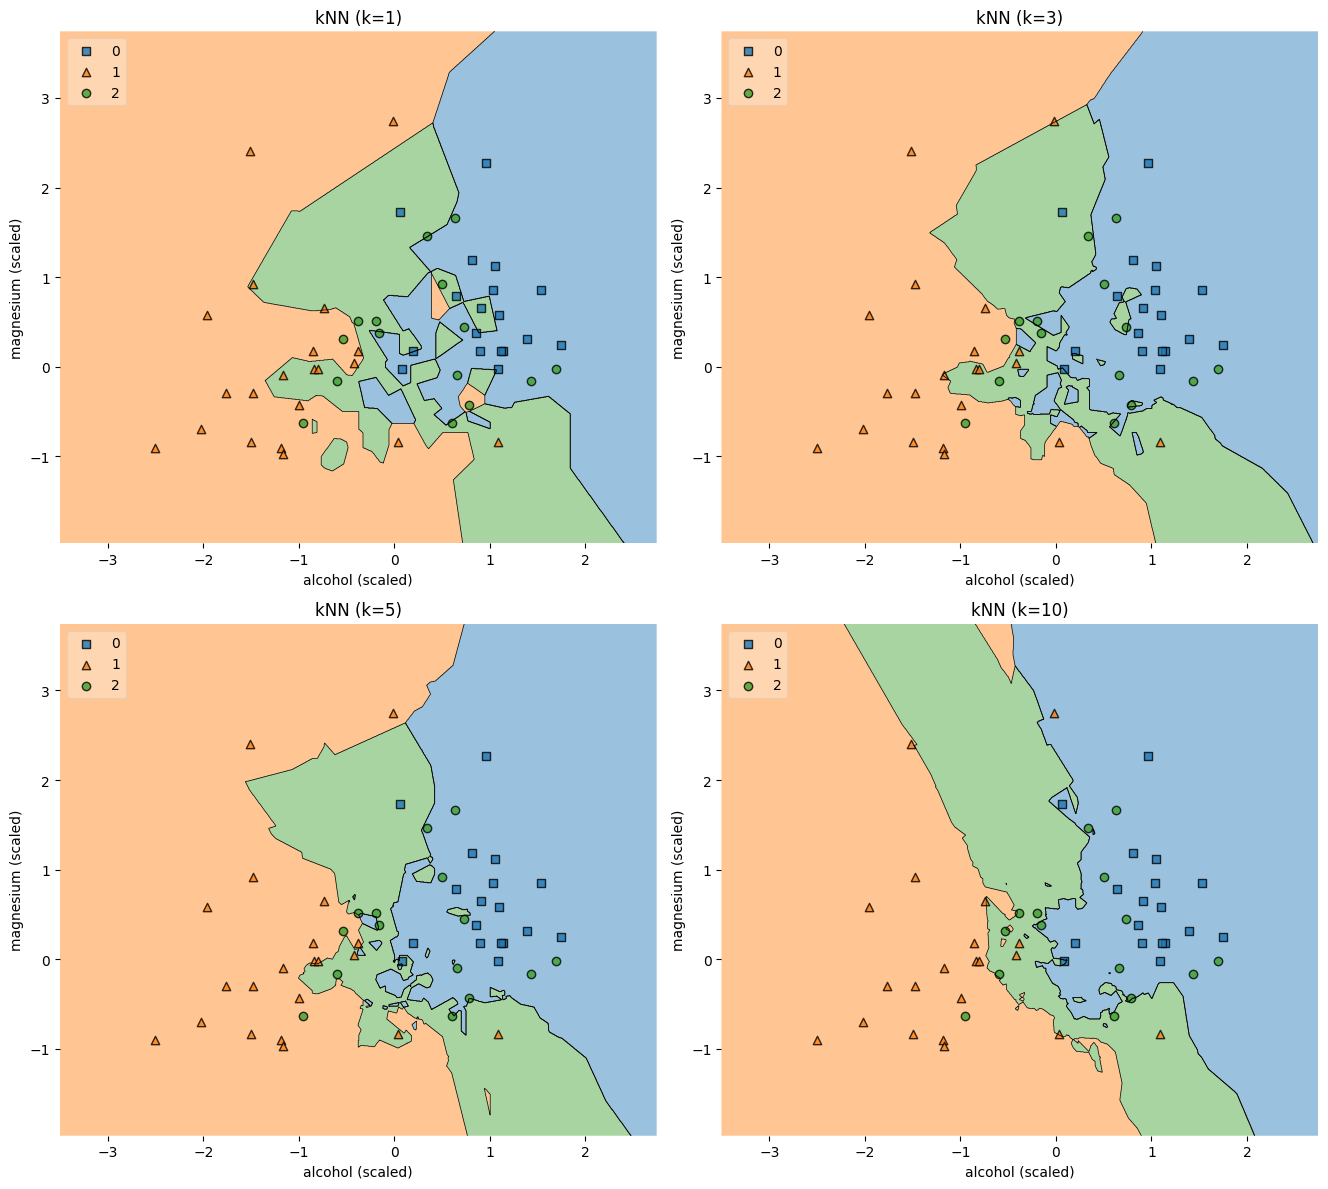

In [30]:
gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(20, 12))

for clf, lab, grd in zip(classifiers, 
                         [f'kNN (k={n})' for n in n_neighbors_list],
                         itertools.product([0, 1], repeat=2)):
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_decision_regions(X=X_test_plot, y=y_test_plot, clf=clf, legend=2)
    plt.title(lab)
    plt.xlabel('alcohol (scaled)')
    plt.ylabel('magnesium (scaled)')

plt.tight_layout()
plt.show()

## Задание 2. KNN своими руками (дополнительно, необязательно). 

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

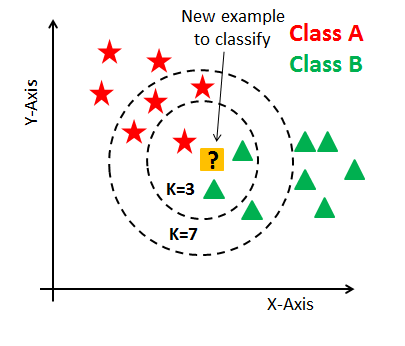

In [31]:
import numpy as np
from collections import Counter  

In [35]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k: int):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
    
    def _euclidean_distance(self, x1, x2):

        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def predict(self, X):
        X = np.array(X)
        predictions = []
        
        for x in X:
            # Вычисляем расстояния до всех тренировочных точек
            distances = []
            for i, x_train in enumerate(self.X_train):
                dist = self._euclidean_distance(x, x_train)
                distances.append((dist, self.y_train[i]))
            
            # Сортируем по расстоянию и берем k ближайших соседей
            distances.sort(key=lambda x: x[0])
            k_nearest = distances[:self.k]
            
            # Берем метки k ближайших соседей
            k_nearest_labels = [label for _, label in k_nearest]
            
            # Находим наиболее частую метку (голосование)
            most_common = Counter(k_nearest_labels).most_common(1)
            predictions.append(most_common[0][0])
        
        return np.array(predictions)

In [36]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [37]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)